# PyData Sri Lanka

09<sup>th</sup> Aug 2024

---


Let's start by importing the required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales.xlsx to supermarket_sales.xlsx


## 1. PREPARING DATA

In [2]:
# Read the CSV file and store it to the variable df
df = pd.read_excel('supermarket_sales.xlsx')


In [6]:
# Print the first 10 records of the DataFrame
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

## 2. INTRODUCTION TO DATA VISUALIZATION

- Data visualization involves converting data into information in the form of visual elements like charts and graphs.

- In Python, there are several libraries built for data visualization.
  - [Matplotlib](https://matplotlib.org/stable/users/index) (default)
  - [Seaborn](https://seaborn.pydata.org/)
  - [Plotly](https://plotly.com/python/)
  - [ggplot](https://yhat.github.io/ggpy/docs.html)
  - [Bokeh](https://docs.bokeh.org/en/latest/)

### *Getting started with Matplotlib*

Let's plot a simple line chart!

---



Text(0.5, 1.0, 'My First Line Chart')

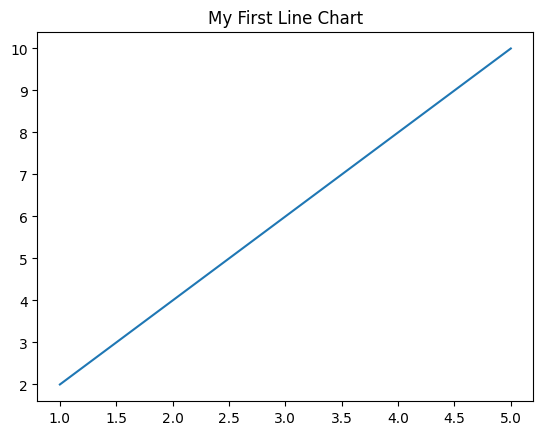

In [8]:
x = [1,2,3,4,5] # x variables
y = [2,4,6,8,10] # y variables

# Plotting the chart
plt.plot(x,y,)
# Adding a title
plt.title("My First Line Chart")

Refer to the pyplot documentation [(linked here)](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py) and do the below:

1. Change the line colour to red
2. Label x axis as "x_title"
3. Label y axis as "y_title"
4. Display the grid lines
5. Save the chart in png format

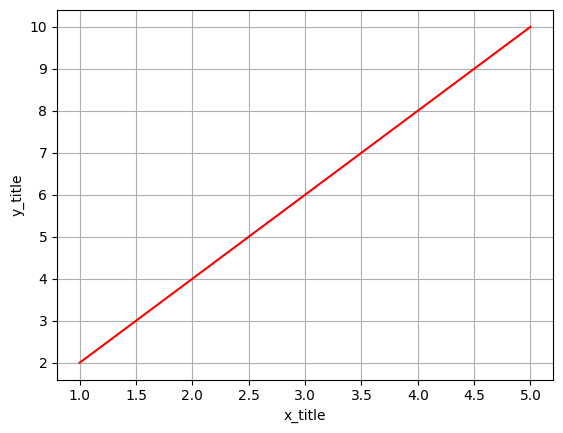

In [9]:
# 1. Plot the chart and change the line colour to red
plt.plot(x,y,color='red')
# 2. Label x axis
plt.xlabel('x_title')
# 3. Label y axis
plt.ylabel('y_title')
# 4. Display the grid lines
plt.grid(True)
# 5. Save the chart
plt.savefig("my_first_chart.png")

### *What charts should I use?*

---



#### 2.1 QUALITATIVE DATA
- Bar charts (verticle, horizontal,stacked)
- Pie charts


Observe the composition of **customer type** in the dataset.

In [10]:
# This step is to transform data into the required format

# Calculate the count for each Customer type
customer_type_count = df['Customer type'].value_counts()
# Print Customer type counts
print(customer_type_count)

Customer type
Member    501
Normal    499
Name: count, dtype: int64


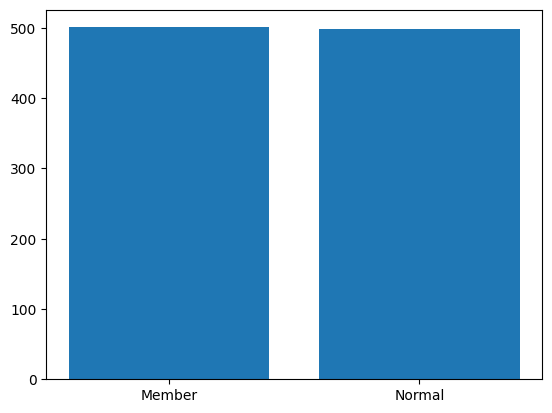

In [11]:
# Plot a bar chart
plt.bar(customer_type_count.index, customer_type_count.values)
# Display the chart
plt.show()

**Now, try to display the above chart as a pie chart.**

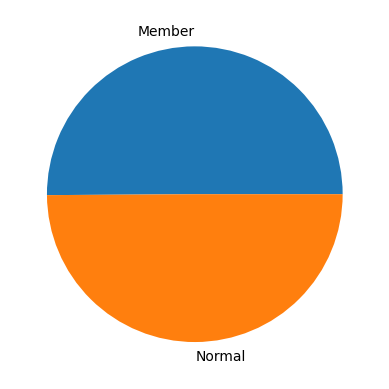

In [12]:
# Plot a pie chart
plt.pie(customer_type_count.values, labels=customer_type_count.index)
# Display the chart
plt.show()

#### 2.2 RELATIONSHIP BETWEEN TWO QUANTITATIVE VARIABLES
- Scatter plots

Let's check if a relationship exists between the total value of a bill ("Total") and the time taken to make the purchase ("Time") for "Health and beauty" product category.

In [13]:
# This step is to transform data into the required format
df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].str.split(':').str[0].astype(int)
df['Time'] = df['Time'].astype(int)

# Filter the dataframe to only include Health and beauty products
health_df = df.loc[df['Product line'] == 'Health and beauty']


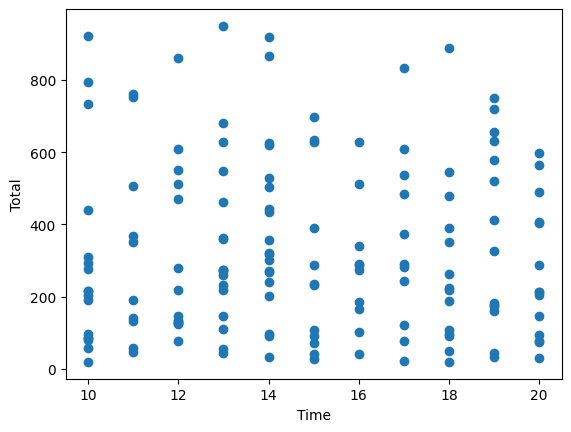

In [14]:
# Plot a scatter plot
plt.scatter(health_df['Time'], health_df['Total'])
# Add x-axis title
plt.xlabel('Time')
# Add y axis title
plt.ylabel('Total')
# Display the chart
plt.show()

#### 2.3 TRENDS OVER TIME

- Line charts

Observe the trend of **total sales** over time.

In [15]:
# This step is to transform data into the required format
df['Date'] = df['Date'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

# First we need to convert the dataframe to a series
# Group the dataframe by  date and take the sum of Total
df_grouped_ser = df.groupby('Date')['Total'].sum()
# Observe the series
df_grouped_ser.head()

,Total
Date,
2019-01-01,4745.1810
2019-01-02,2444.5365
2019-01-03,2634.3660
2019-01-13,2451.2040
2019-01-14,3966.6165


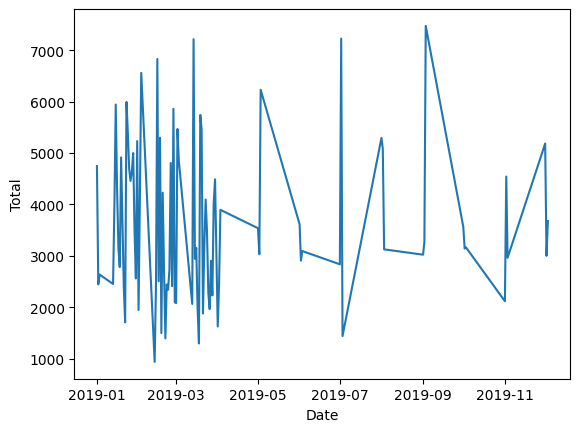

In [16]:
# Plot a line chart
# Since the default chart type is line we do not need to specify
plt.plot(df_grouped_ser.index, df_grouped_ser.values)
# Add x-axis title
plt.xlabel('Date')
# Add y axis title
plt.ylabel('Total')
# Display the chart
plt.show()

#### 2.4 DISTRIBUTIONS
- Histograms
- Box plots


**A note on histograms**


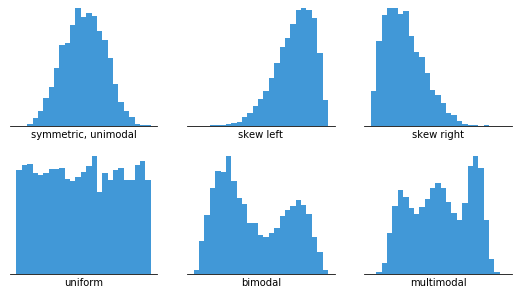


- To draw a histogram we need to have continuous numeric values.
- The x-axis shows the data being measured, while the y-axis represents the number of observations in each bin.
- Histograms help us to understand the range (spread) of our data.
- The shape of a histogram tells us a story.



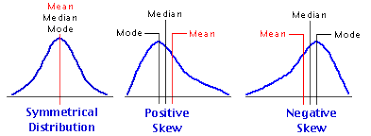


Let's observe the spread of the **gross income** in our dataset.

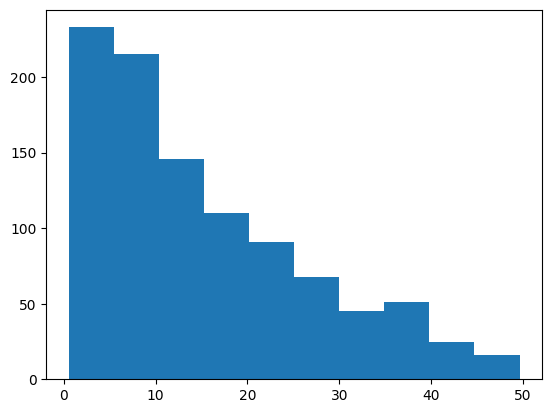

In [18]:
# Plot a histogram

# hint: hist
plt.hist(df['gross income'])
plt.show()


In [ ]:
# Plot a boxplot
# hint: boxplot
plt.b

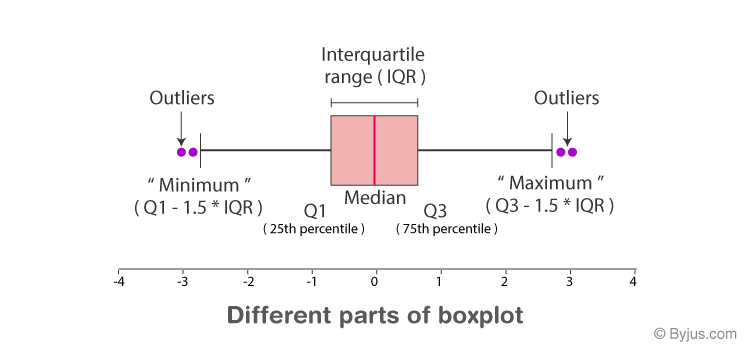

<br>

---


<h3>
This is just a taste of the many chart types out there. <br>

(Have you ever come across [Sankey Diagrams](hhttps://plotly.com/python/sankey-diagram/)? It is a chart that many of us are not familiar with, but is considered a powerful visualization to show how data flows between different stages.) </h3>

<center>
<H1> <i>Dive in and discover more on your own!!!</i> </H1>
<H1> <i>Cheers 🎉</i> </H1>
</center>